# Global links

In [1]:
import sys
import os
import pandas as pd
import networkx as nx

# Get the parent directory of your current directory
parent_dir = os.path.dirname(os.getcwd())

# Add the parent directory to the sys.path
sys.path.append(parent_dir)

# Now you can import your module as usual
from SimulationRL import *

populationMap   = '../Population Map/gpw_v4_population_count_rev11_2020_15_min.tif'
outputPath      = './GlobalLinks/'
inputPath       = '../'

No GPU available


In [2]:
inputParams = pd.read_csv(inputPath + "inputRL.csv")

locations = inputParams['Locations'].copy()
print('Nº of Gateways: ' + str(len(locations)))


env = simpy.Environment()
earth, _, _, _ = initialize(env, populationMap, inputPath + 'Gateways.csv', rKM, inputParams, movementTime, locations, outputPath)
G = earth.gateways[0].graph

Nº of Gateways: 18
Using Kepler constellation design
total divisions in x = 1440
 total divisions in y = 720
 total cells = 1036800
 window of operation (longitudes) = (0, 1440)
 window of operation (latitudes) = (0, 720)

Finding cells within coverage area of GT 18 of 18
Time taken to find cells that are within range of all GTs: 9.737577676773071 seconds
Time taken to add cell information to all GTs: 0.24735212326049805 seconds

Traffic generated per GT (totalAvgFlow per Milliard):
----------------------------------
Malaga, Spain: 2.0
Los Angeles, California, US: 2.0
Aalborg, Denmark: 2.0
Cordoba, Argentina (partner station): 2.0
Tolhuin, Argentina (partner station): 2.0
Inuvik, Northwest Territories, Canada: 2.0
Nemea, Greece: 2.0
Nuuk, Greenland: 2.0
Bangalore, India (partner station): 2.0
Tokyo, Japan: 2.0
Mauritius: 2.0
Awarua, New Zealand: 2.0
Svalbard, Norway: 2.0
Vardø, Norway: 2.0
Azores, Portugal (partner station): 2.0
Singapore: 2.0
Hawaii, US: 2.0
Jeju, South Korea: 2.0
---

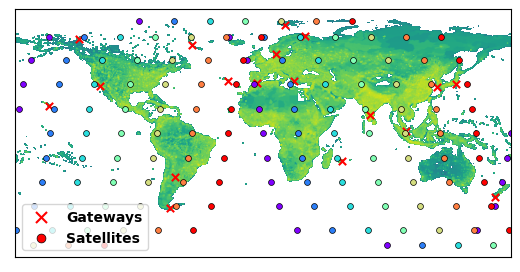

In [4]:
earth.plotMap(plotGT = True, plotSat = True)

In [5]:
print(G)

# Assuming G is your NetworkX graph
# Convert complex attributes to simple types (e.g., just use the name or id of the Satellite)
for node in G.nodes():
    if isinstance(G.nodes[node]['attribute_name'], SimulationRL.Satellite):
        G.nodes[node]['attribute_name'] = G.nodes[node]['attribute_name'].id  # or any other unique identifier

# Similarly for edges, if there are any complex types
for u, v, key in G.edges(keys=True):
    if isinstance(G[u][v][key]['attribute_name'], SimulationRL.Satellite):
        G[u][v][key]['attribute_name'] = G[u][v][key]['attribute_name'].id

# Now write to GraphML
nx.write_graphml(G, outputPath + 'Graph.graphml')



Graph with 158 nodes and 282 edges


KeyError: 'attribute_name'

In [4]:

nx.write_graphml(G, outputPath + 'Graph.graphml')


KeyError: <class 'SimulationRL.Satellite'>